In [1]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt

from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.statistics.traces.generic.log import case_statistics

In [3]:
# Data Import:
xes_path = "/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/BPI Challenge 2017_1_all/BPI Challenge 2017.xes.gz"

# Read the XES log
event_log = xes_importer.apply(xes_path)

/opt/miniconda3/envs/bpi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 31509/31509 [00:32<00:00, 971.73it/s] 


In [4]:
# Transform the event log to a pandas DataFrame
df = log_converter.apply(event_log, variant=log_converter.Variants.TO_DATA_FRAME)

# Basic Analysis: 

- number of cases.
- number of events.
- number of process variants.
- number of case and event labels.
- mean and standard deviation of case length.
- mean and standard deviations of case duration
(days, minutes, seconds).
- number of categorical event attributes.

In [5]:
# Number of cases
number_cases = len(event_log)
print(number_cases)

31509


In [6]:
# Number of Events
number_events = sum(len(trace) for trace in event_log)
print(number_events)

1202267


In [7]:
# Process Variants
variants_count = case_statistics.get_variant_statistics(event_log)
print(len(variants_count))
variants_count[:10]

15930


[{'variant': ('A_Create Application',
   'A_Submitted',
   'W_Handle leads',
   'W_Handle leads',
   'W_Complete application',
   'A_Concept',
   'W_Complete application',
   'A_Accepted',
   'O_Create Offer',
   'O_Created',
   'O_Sent (mail and online)',
   'W_Complete application',
   'W_Call after offers',
   'W_Call after offers',
   'A_Complete',
   'W_Call after offers',
   'W_Call after offers',
   'W_Call after offers',
   'A_Cancelled',
   'O_Cancelled',
   'W_Call after offers'),
  'count': 1056},
 {'variant': ('A_Create Application',
   'W_Complete application',
   'W_Complete application',
   'A_Concept',
   'A_Accepted',
   'O_Create Offer',
   'O_Created',
   'O_Sent (mail and online)',
   'W_Complete application',
   'W_Call after offers',
   'W_Call after offers',
   'A_Complete',
   'W_Call after offers',
   'W_Call after offers',
   'W_Call after offers',
   'A_Cancelled',
   'O_Cancelled',
   'W_Call after offers'),
  'count': 1021},
 {'variant': ('A_Create Applicat

In [8]:
# Number of case & event labels
num_case_labels = df['case:concept:name'].nunique()
num_event_labels = df['concept:name'].nunique()
print(num_case_labels)
print(num_event_labels)

31509
26


38.16
16.72


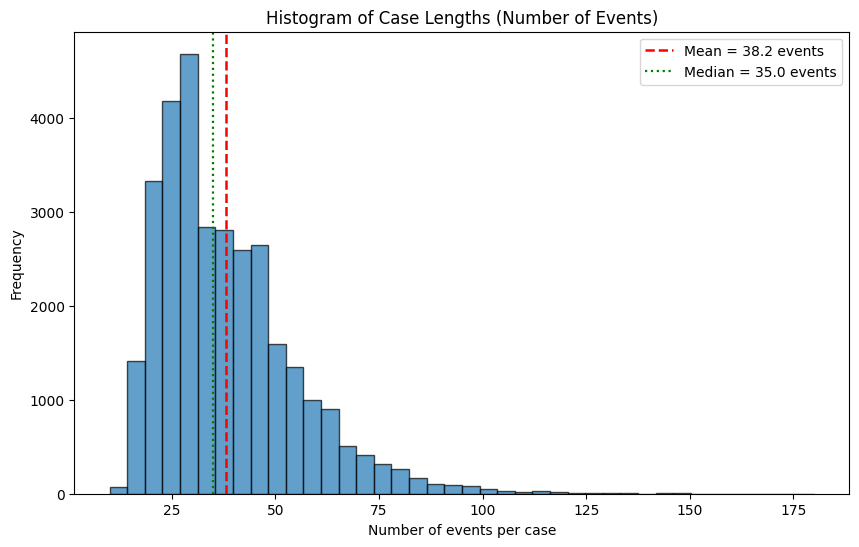

In [9]:
# Mean and standard deviation of case length
case_lengths = df.groupby('case:concept:name')['concept:name'].count()
mean_case_length = case_lengths.mean()
median_case_length = case_lengths.median()
std_case_length = case_lengths.std()

print(mean_case_length.round(2))
print(std_case_length.round(2))
n_cases = case_lengths.shape[0]

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(case_lengths, bins=40, edgecolor='black', alpha=0.7)

# Mean & median lines
ax.axvline(mean_case_length, linestyle='--', color='red', linewidth=1.8, label=f'Mean = {mean_case_length:.1f} events')
ax.axvline(median_case_length, linestyle=':', color='green', linewidth=1.6, label=f'Median = {median_case_length:.1f} events')

# Labels and title
ax.set_xlabel('Number of events per case')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Case Lengths (Number of Events)')
ax.legend()

# Save the plot
# output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/case_length_activities.png'  # You can change the filename or path
# plt.savefig(output_path, dpi=200, bbox_inches='tight')

plt.show()

In [10]:
# Mean and standard deviation of case duration in seconds
case_durations = pm4py.get_all_case_durations(df)
case_durations_series = pd.Series(case_durations)
mean_duration = case_durations_series.mean()
std_duration = case_durations_series.std(ddof=1)

mean_td = pd.to_timedelta(mean_duration, unit='s')
std_td = pd.to_timedelta(std_duration, unit='s')

print("Mean duration:", mean_td)
print("Std duration:", std_td)


Mean duration: 21 days 21:35:25.923069948
Std duration: 13 days 04:03:41.690875763


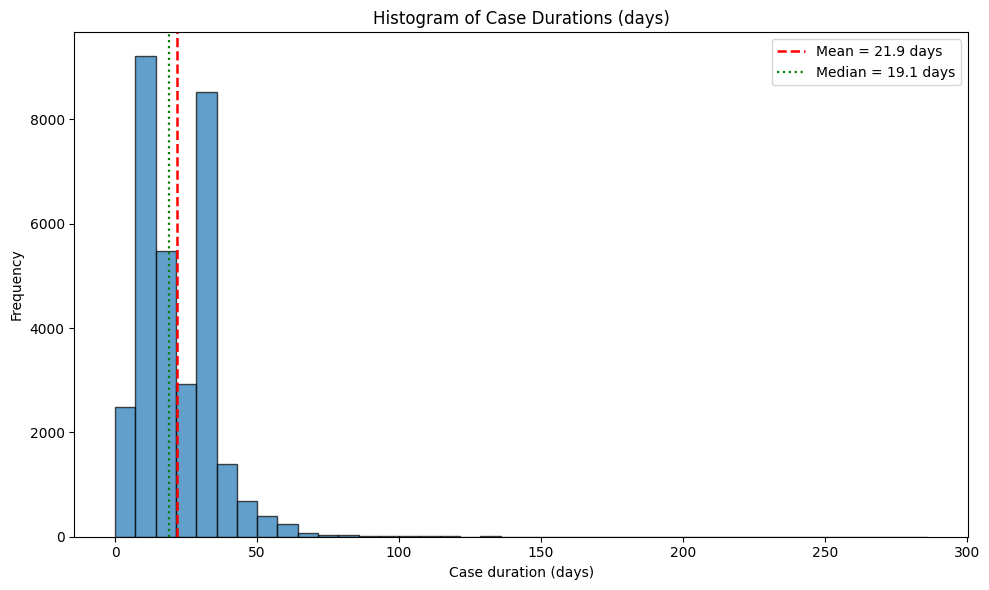

In [11]:
# Convert durations to days
durations_days = case_durations_series.astype(float) / (3600 * 24)

# Basic stats
mean_days = durations_days.mean()
median_days = durations_days.median()
std_days = durations_days.std(ddof=1)
n_cases = durations_days.dropna().shape[0]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(durations_days, bins=40, edgecolor='black', alpha=0.7)

# Mean & median lines
ax.axvline(mean_days, linestyle='--', color='red', linewidth=1.8, label=f'Mean = {mean_days:.1f} days')
ax.axvline(median_days, linestyle=':', color='green', linewidth=1.6, label=f'Median = {median_days:.1f} days')

# Labels and title
ax.set_xlabel('Case duration (days)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Case Durations (days)')
ax.legend()

plt.tight_layout()

# Save the figure to a file
#output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/case_duration_days.png'  # You can change the filename or path
#plt.savefig(output_path, dpi=200, bbox_inches='tight')  # dpi=200 gives good quality, bbox_inches='tight' trims whitespace
plt.show()


In [12]:
# number of categorical event attributes
categorical_columns = df.select_dtypes(include=["object", "bool"]).columns
cat_col_count = len(categorical_columns)
print(cat_col_count)
print(categorical_columns)


12
Index(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'case:LoanGoal', 'case:ApplicationType',
       'case:concept:name', 'Accepted', 'Selected', 'OfferID'],
      dtype='object')


In [13]:
# number of unique resources
num_resources = df['org:resource'].nunique()
print("Number of unique resources:", num_resources)


Number of unique resources: 149


In [14]:
# events per day
events_per_day = df.groupby(df['time:timestamp'].dt.date).size()

print("Mean events per day:", events_per_day.mean())
print("Std events per day:", events_per_day.std())


Mean events per day: 3020.7713567839196
Std events per day: 1779.3079345431272


In [15]:
# Percentage of cases with >1 offer

cases_with_offers = df.dropna(subset=['OfferID'])
multi_offer_cases = cases_with_offers.groupby('case:concept:name')['OfferID'].nunique()

pct_multi_offer = (multi_offer_cases > 1).mean() * 100
print("Percentage of cases with >1 offer:", pct_multi_offer.round(2), "%")


Percentage of cases with >1 offer: 27.16 %


In [16]:
# Most frequent activity

most_freq_activity = df['concept:name'].value_counts().idxmax()
print("Most frequent activity:", most_freq_activity)


Most frequent activity: W_Validate application


In [17]:
df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])

df_sorted['next_time'] = df_sorted.groupby('case:concept:name')['time:timestamp'].shift(-1)
df_sorted['time_diff'] = df_sorted['next_time'] - df_sorted['time:timestamp']

mean_inter_event = df_sorted['time_diff'].dropna().mean()
print("Mean time between consecutive events:", mean_inter_event)


Mean time between consecutive events: 0 days 14:08:43.415180601


Number of cases with loops: 31509
Number of cases with loops: 31509 / 31509
Mean loops per case: 1.00
Median loops per case: 1.00


/opt/miniconda3/envs/bpi/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7132: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


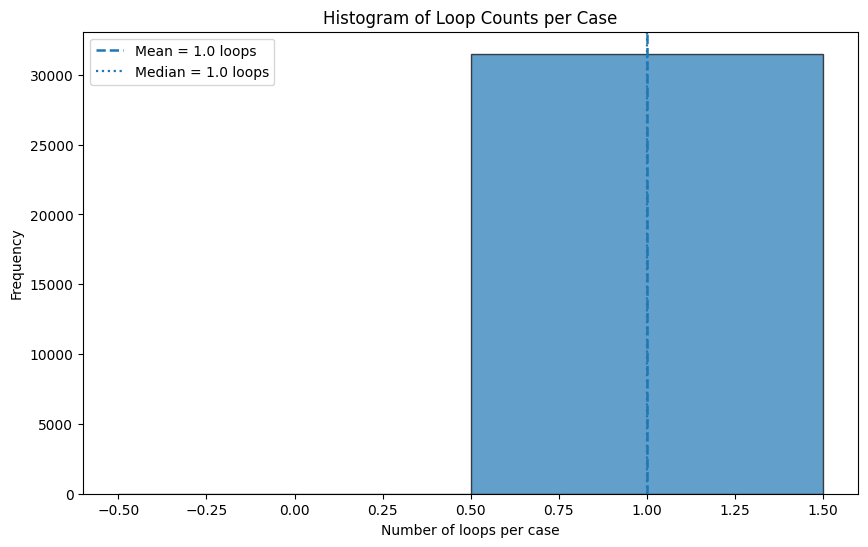

In [18]:
# loops? 

def has_loop(events):
    return len(events) != len(set(events))

cases_with_loops = df.groupby('case:concept:name')['concept:name'].apply(has_loop)
print("Number of cases with loops:", cases_with_loops.sum())

# Basic stats
mean_loops = cases_with_loops.mean()
median_loops = cases_with_loops.median()
std_loops = cases_with_loops.std(ddof=1)
n_cases = cases_with_loops.shape[0]

print(f"Number of cases with loops: {(cases_with_loops > 0).sum()} / {n_cases}")
print(f"Mean loops per case: {mean_loops:.2f}")
print(f"Median loops per case: {median_loops:.2f}")

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cases_with_loops, bins=range(0, cases_with_loops.max() + 2), edgecolor='black', alpha=0.7, align='left')

# Mean & median lines
ax.axvline(mean_loops, linestyle='--', linewidth=1.8, label=f'Mean = {mean_loops:.1f} loops')
ax.axvline(median_loops, linestyle=':', linewidth=1.6, label=f'Median = {median_loops:.1f} loops')

# Labels and title
ax.set_xlabel('Number of loops per case')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Loop Counts per Case')
ax.legend()

# Save the plot
#output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/case_loop_activities.png'  # You can change the filename or path
#plt.savefig(output_path, dpi=200, bbox_inches='tight')

plt.show()


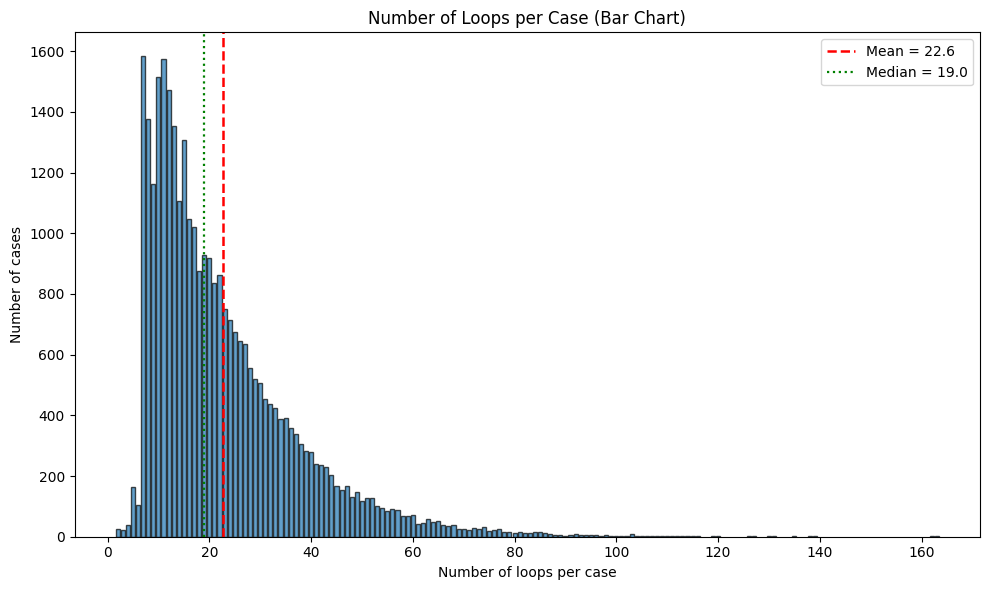

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to count loops per case
def count_loops(events):
    return len(events) - len(set(events))

# Apply to each case
loop_counts = df.groupby('case:concept:name')['concept:name'].apply(count_loops)

# Count frequency of each loop count
loop_freq = loop_counts.value_counts().sort_index()

# Compute mean and median
mean_loops = loop_counts.mean()
median_loops = loop_counts.median()

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(loop_freq.index, loop_freq.values, alpha=0.7, edgecolor='black')

# Mean & median lines
ax.axvline(mean_loops, linestyle='--', color='red', linewidth=1.8, label=f'Mean = {mean_loops:.1f}')
ax.axvline(median_loops, linestyle=':', color='green', linewidth=1.6, label=f'Median = {median_loops:.1f}')

# Labels and title
ax.set_xlabel('Number of loops per case')
ax.set_ylabel('Number of cases')
ax.set_title('Number of Loops per Case (Bar Chart)')
ax.legend()

plt.tight_layout()

# Save the plot
#output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/case_loop_activities.png'  # You can change the filename or path
#plt.savefig(output_path, dpi=200, bbox_inches='tight')

plt.show()


In [20]:
# Activity count 

activity_counts = df['concept:name'].value_counts()
print(activity_counts)

concept:name
W_Validate application        209496
W_Call after offers           191092
W_Call incomplete files       168529
W_Complete application        148900
W_Handle leads                 47264
O_Create Offer                 42995
O_Created                      42995
O_Sent (mail and online)       39707
A_Validating                   38816
A_Create Application           31509
A_Concept                      31509
A_Accepted                     31509
A_Complete                     31362
O_Returned                     23305
A_Incomplete                   23055
O_Cancelled                    20898
A_Submitted                    20423
O_Accepted                     17228
A_Pending                      17228
A_Cancelled                    10431
O_Refused                       4695
A_Denied                        3753
W_Assess potential fraud        3282
O_Sent (online only)            2026
W_Shortened completion           238
W_Personal Loan collection        22
Name: count, dtype: int64

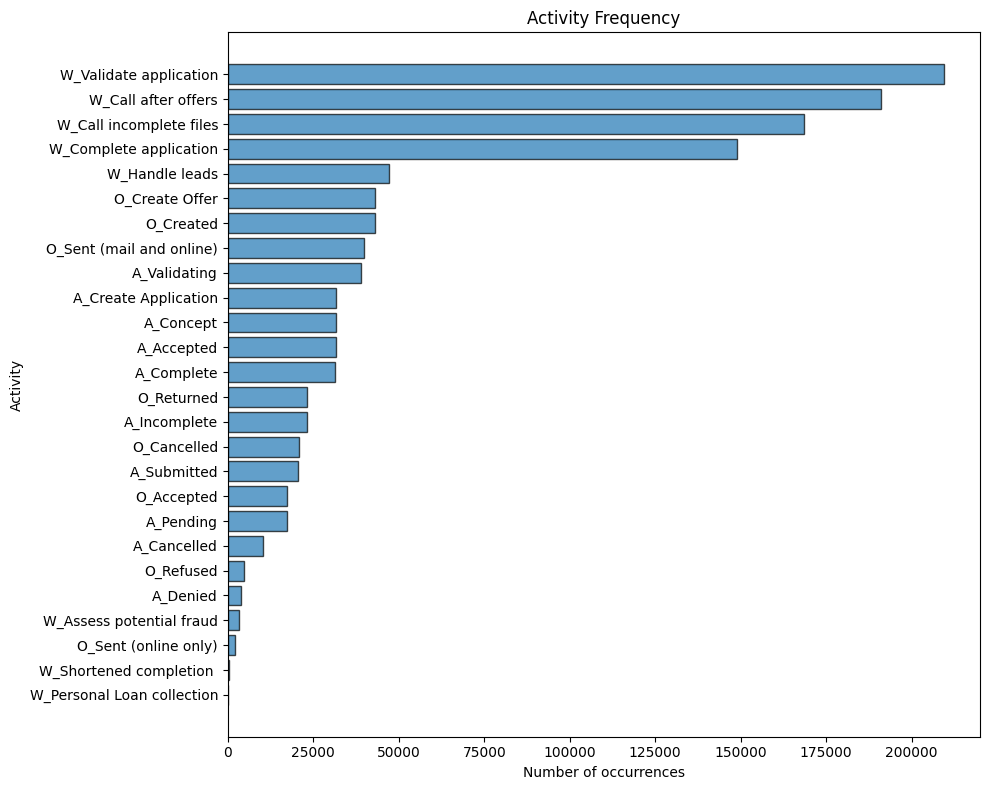

In [21]:
# Sort activities by frequency (already sorted by value_counts)
activities = activity_counts.index
frequencies = activity_counts.values

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(activities, frequencies, alpha=0.7, edgecolor='black')

# Invert y-axis so the highest frequency is on top
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Number of occurrences')
ax.set_ylabel('Activity')
ax.set_title('Activity Frequency')

plt.tight_layout()

# Save the plot
#output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/case_activites_frequencies.png'  # You can change the filename or path
#plt.savefig(output_path, dpi=200, bbox_inches='tight')
plt.show()


In [22]:
end_activities = pm4py.get_end_activities(
    df,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)
end_activities_series = pd.Series(end_activities)

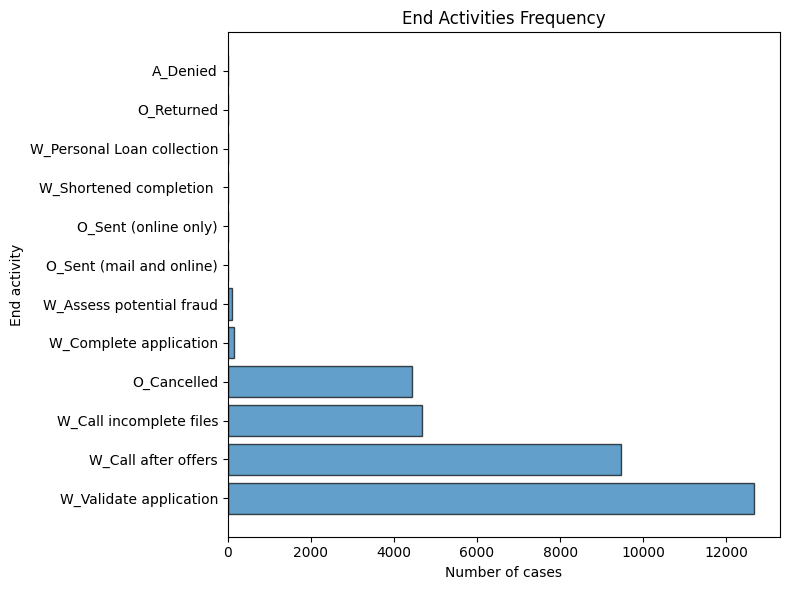

In [23]:
import matplotlib.pyplot as plt

# Sort end activities for horizontal bar chart
end_activities_sorted = end_activities_series.sort_values(ascending=True)

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(end_activities_sorted.index, end_activities_sorted.values, alpha=0.7, edgecolor='black')

# Invert y-axis so the most frequent activity is on top
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Number of cases')
ax.set_ylabel('End activity')
ax.set_title('End Activities Frequency')

plt.tight_layout()

# Save the plot
#output_path = '/Users/moritz_hawener/Documents/Work/Studium/Master/WS25/BPI/Code/FinalReport/plots/end_activites.png'  # You can change the filename or path
#plt.savefig(output_path, dpi=200, bbox_inches='tight')
plt.show()
